In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [ ]:
##Getting a dataset. we are using datasets of fashionmst
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


100%|██████████| 26.4M/26.4M [00:15<00:00, 1.67MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.72MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.0MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
image , labels = train_data[0]
image , labels

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets


tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image.shape##color channels, height ,width

torch.Size([1, 28, 28])

In [ ]:
labels

9

In [ ]:
class_names[labels]

'Ankle boot'

In [ ]:
class_names[0]

'T-shirt/top'

torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

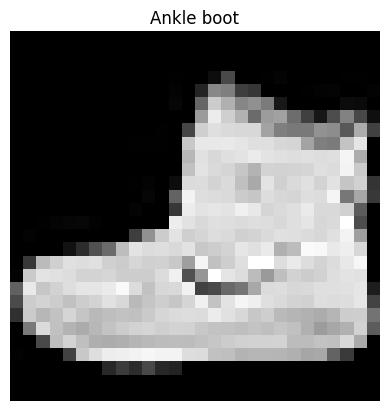

In [ ]:
##visualising our data
import matplotlib.pyplot as plt
image , labels = train_data[0]
print(image.shape)
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[labels])
plt.axis(False)

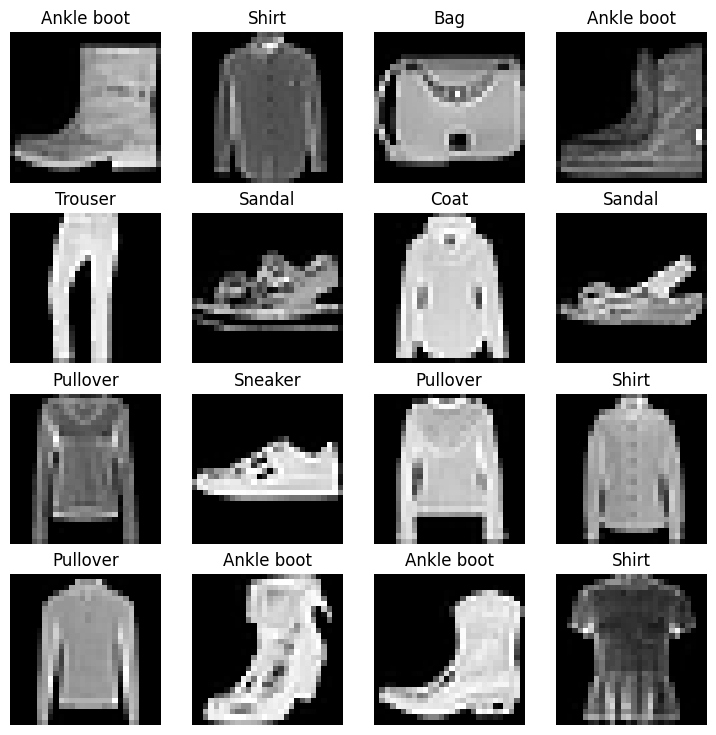

In [ ]:
#plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),(1,)).item()
    image, labels = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap="gray")
    plt.title(class_names[labels])
    plt.axis(False)

In [ ]:
##prepare dataloader
from torch.utils.data import DataLoader # Changed 'dataloader' to 'DataLoader'
#setup the batch size i.e. making a sample of 32 out of 1000population size
BATCH_SIZE = 32
#turn datasets into batches
train_dataloader = DataLoader(dataset =train_data,batch_size=BATCH_SIZE,shuffle=True) # Changed 'dataLoader' to 'DataLoader'
test_dataloader = DataLoader(dataset = test_data,batch_size=BATCH_SIZE,shuffle=False) # Changed 'dataLoader' to 'DataLoader'

In [ ]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e9e6582dd90>,
 <torch.utils.data.dataloader.DataLoader at 0x7e9e658818d0>)

In [ ]:
len(train_dataloader)

1875

In [ ]:
len(test_dataloader)

313

In [ ]:
#check out whats inside the train dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

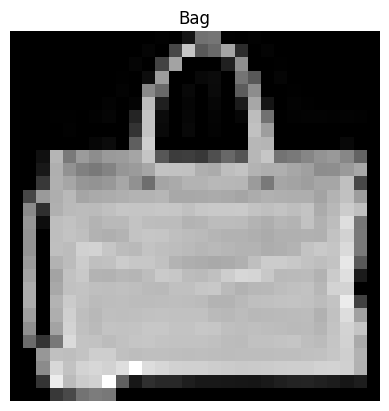

In [ ]:
#show the sample
#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size = [1]  ).item()
img , labels = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[labels])
plt.axis(False)

In [ ]:
##Buuild a model using computer vision
##create the flatten layer
flaten_model = nn.Flatten()


#Get a single sample
X = train_features_batch[0]
X

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000,
          0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000,

In [ ]:
X.shape

torch.Size([1, 28, 28])

In [ ]:
##Flatten the sample
output = flaten_model(X)
print(f"shape before flatting{X.shape } and shape after flatning {output.shape}")

shape before flattingtorch.Size([1, 28, 28]) and shape after flatning torch.Size([1, 784])


In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

##Builing the base model

In [ ]:
import torch
from torch  import nn
class FashionMNISTV0(nn.Module):
  def __init__(self,
               input_shape = int,
               hidden_units = int,
               output_shape = int):

     super().__init__()
     self.layer_stack = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features = input_shape,out_features = hidden_units),

         nn.Linear(in_features = hidden_units,out_features = output_shape)

     )
  def forward(self, X):
    return self.layer_stack(X)

In [ ]:
torch.manual_seed(42)
#setup model with input paremeter
model_0 = FashionMNISTV0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape = len(class_names)
).to("cpu")
model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import torch
from torch import nn
from torch.autograd.grad_mode import inference_mode

# Create the dummy tensor outside inference_mode
dummy = torch.rand([1,1,28,28])

with inference_mode():
  # Now use the dummy tensor within inference_mode
  print(model_0(dummy))

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]])


In [ ]:
#Setup loss , optimizer and evaluation metrics

In [ ]:
import urllib.request # Importing the 'urllib.request' module instead of 'requests'
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  urllib.request.urlretrieve(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py", # Using 'urllib.request.urlretrieve'
                      filename="helper_functions.py") # Downloading the file

In [ ]:
from helper_functions import accuracy_fn
#setup loss fn
loss_fn = nn.CrossEntropyLoss()
#setup optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01)

In [ ]:
##import tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epoch {epoch}")
  train_loss = 0
  for batch , (X,y) in enumerate(train_dataloader):
    model_0.train()
    #1 Forward pass
    y_pred = model_0(X)
    #2 calculalte the loss(per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    #3 optimizer zero grad
    optimizer.zero_grad()
    #4 loss backward
    loss.backward()
    #5 optimizer step
    optimizer.step()
    #print whats happening
    if batch%400 == 0:
      print(f"looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)
  ##testing
  test_loss,test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred = model_0(X)
      # Accumulate loss and accuracy as Python numbers within inference_mode
      test_loss += loss_fn(test_pred,y).item()
      test_acc += accuracy_fn(y_true = y,y_pred = test_pred.argmax(dim=1))
  # Calculate average loss and accuracy outside inference_mode
  test_loss /= len(test_dataloader)
  test_acc /= len(test_dataloader)
  print(f"train loss {train_loss} and test loss {test_loss} and test acc {test_acc}")

  0%|          | 0/3 [00:00<?, ?it/s]

epoch 0
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples
train loss 0.9096065759658813 and test loss 0.6290155898648709 and test acc 78.63418530351437
epoch 1
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples
train loss 0.557327151298523 and test loss 0.5440863735093096 and test acc 81.13019169329074
epoch 2
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples
train loss 0.5026633143424988 and test loss 0.5136752322363777 and test acc 81.9988019169329


In [ ]:
##Evaluate the model
torch.manual_seed(42)
def eval_model(
    model:torch.nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    accuracy_fn
):
  loss ,acc =0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred = model(X)
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true = y,y_pred = y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name":model.__class__.__name__,"model_loss":loss.item(),"model_acc":acc}
model_0_results = eval_model(
    model = model_0,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
model_0_results



{'model_name': 'FashionMNISTV0',
 'model_loss': 0.5136752128601074,
 'model_acc': 81.9988019169329}

##Building the CNN model

In [ ]:
class FashionMNISTV1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.classifier = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features = hidden_units*7*7,out_features = output_shape)

    )
  def forward(self,X):
      X = self.conv_block_1(X)
      #print(X.shape)
      X = self.conv_block_2(X)
      #print(X.shape)
      X = self.classifier(X)
      #print(X.shape)
      return X


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTV1(
    input_shape = 1,
    hidden_units = 30,
    output_shape = len(class_names)
).to("cpu")
model_2

FashionMNISTV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [ ]:
random_img_tensor = torch.rand(size=(1,28,28))
random_img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(random_img_tensor.unsqueeze(0))

tensor([[ 0.0112,  0.0251, -0.0201, -0.0092,  0.0297, -0.0347,  0.0012, -0.0229,
          0.0229, -0.0248]], grad_fn=<AddmmBackward0>)

In [ ]:
##setup loss function
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),lr = 0.01)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
# Instead of:
# from helper_functions import train_step, test_step

# Define the train_step and test_step functions directly in your notebook
# if they are not present in helper_functions.py:
def train_step(model, data_loader, loss_fn, optimizer, accuracy_fn):
    """Trains a PyTorch model for a single epoch.

    Args:
        model: The PyTorch model to be trained.
        data_loader: A DataLoader for the training data.
        loss_fn: The loss function to use.
        optimizer: The optimizer to use.
        accuracy_fn: A function to calculate accuracy.
    """
    model.train()
    train_loss, train_acc = 0, 0
    for X, y in data_loader:
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate average loss and accuracy
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model, data_loader, loss_fn, accuracy_fn):
    """Evaluates a PyTorch model on a test dataset.

    Args:
        model: The PyTorch model to be evaluated.
        data_loader: A DataLoader for the test data.
        loss_fn: The loss function to use.
        accuracy_fn: A function to calculate accuracy.
    """
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in data_loader:
            # 1. Forward pass
            test_pred = model(X)
            # 2. Calculate and accumulate loss and accuracy
            test_loss += loss_fn(test_pred, y).item()
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Calculate average loss and accuracy
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

In [ ]:
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"epoch {epoch}")
  train_step(  # Now calling the imported or previously defined train_step function
      model = model_2,
      data_loader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn
  )
  test_step(  # Now calling the imported or previously defined test_step function
      model = model_2,
      data_loader = test_dataloader,
      loss_fn = loss_fn,
      accuracy_fn = accuracy_fn
  )

  0%|          | 0/5 [00:00<?, ?it/s]

epoch 0
Train loss: 1.01199 | Train accuracy: 63.43%
Test loss: 0.59574 | Test accuracy: 78.18%
epoch 1
Train loss: 0.48391 | Train accuracy: 82.55%
Test loss: 0.43227 | Test accuracy: 84.90%
epoch 2
Train loss: 0.40832 | Train accuracy: 85.34%
Test loss: 0.41749 | Test accuracy: 84.79%
epoch 3
Train loss: 0.36868 | Train accuracy: 86.82%
Test loss: 0.36594 | Test accuracy: 86.98%
epoch 4
Train loss: 0.34016 | Train accuracy: 87.79%
Test loss: 0.36104 | Test accuracy: 87.21%


In [ ]:
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)


In [ ]:
model_2_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.36104363203048706,
 'model_acc': 87.21046325878594}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame(
    data = [model_0_results,model_2_results]
)
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTV0,0.513675,81.998802
1,FashionMNISTV1,0.361044,87.210463


Text(0, 0.5, 'model')

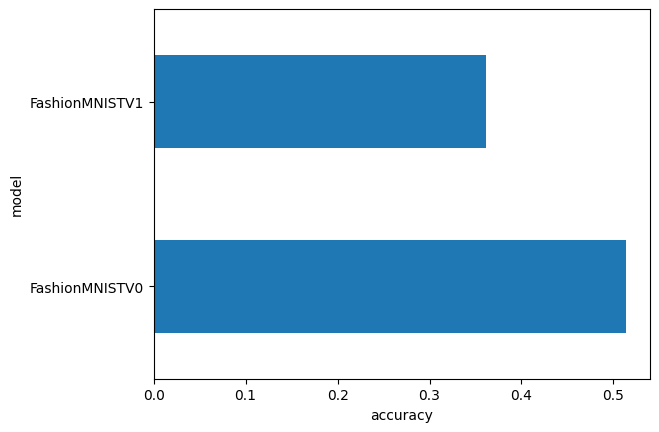

In [ ]:
#visualise our trained model
compare_results.set_index("model_name")["model_loss"].plot(kind = "barh")
plt.xlabel("accuracy")
plt.ylabel("model")


In [ ]:
##Make  predictions
device="cpu"
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)



In [ ]:
test_samples[0].shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

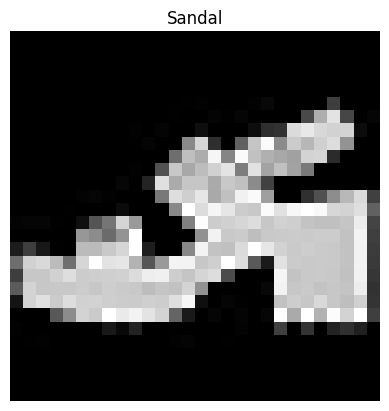

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [ ]:
##Make predictions
pred_prob = make_predictions(model = model_2,data = test_samples)
pred_prob

tensor([[6.6325e-08, 1.7020e-08, 1.5953e-08, 2.8340e-08, 3.4465e-09, 9.9775e-01,
         5.3059e-07, 4.9302e-06, 1.8348e-05, 2.2246e-03],
        [4.8617e-02, 7.7317e-01, 1.2073e-03, 6.3735e-02, 9.0127e-02, 1.2933e-04,
         2.2002e-02, 2.8544e-04, 7.0423e-04, 1.7729e-05],
        [3.6351e-06, 1.8835e-08, 2.6736e-07, 2.0200e-06, 6.2868e-08, 2.6757e-03,
         5.3557e-06, 9.3509e-01, 1.2783e-03, 6.0948e-02],
        [9.9492e-04, 1.2401e-04, 3.0883e-01, 4.0857e-04, 6.8521e-01, 5.9697e-08,
         4.2654e-03, 4.5973e-08, 1.6925e-04, 1.7466e-07],
        [4.2854e-02, 4.0197e-04, 2.7228e-04, 9.3141e-01, 1.5305e-03, 2.2830e-06,
         2.3045e-02, 2.1626e-05, 4.3920e-04, 2.6230e-05],
        [7.1609e-01, 2.9646e-05, 9.4594e-04, 7.5885e-03, 9.1037e-03, 4.7524e-08,
         2.6592e-01, 1.6327e-07, 3.2498e-04, 3.8417e-08],
        [4.3144e-05, 4.5922e-05, 1.2216e-02, 1.6476e-06, 9.7402e-01, 8.9945e-08,
         1.3487e-02, 2.1623e-11, 1.8181e-04, 3.8009e-08],
        [9.2704e-06, 5.1441

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [ ]:
##convert predictions probabilities into lAbels
pred_classes = pred_prob.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

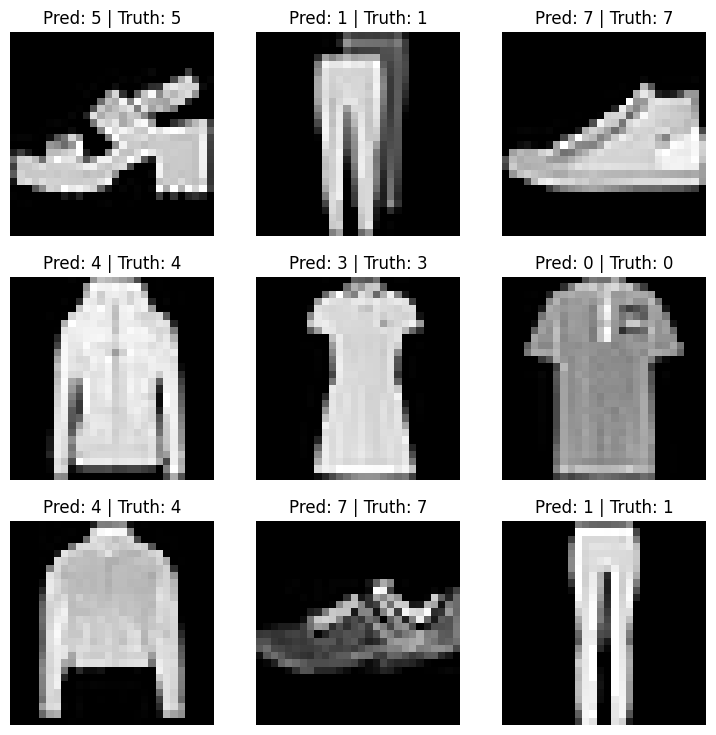

In [ ]:
#plot predictions
plt.figure(figsize=(9,9))
rows, cols = 3,3
for i, sample in enumerate(test_samples):
    plt.subplot(rows, cols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    plt.title(f"Pred: {pred_classes[i]} | Truth: {test_labels[i]}")
    plt.axis(False)

##SAVING THE MODEL

In [ ]:
from pathlib import Path
#create model path dir
Model_path = Path("models")
Model_path.mkdir(parents=True,exist_ok=True)
#create model save
Model_name = "FashionMNISTModelV1.pth"
model_save_path = Model_path/Model_name

# Save the model's state dictionary
torch.save(model_2.state_dict(), model_save_path) # Adding this line to save the model

#create the new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTV1(input_shape = 1,hidden_units = 30,output_shape = len(class_names))
loaded_model_2.load_state_dict(torch.load(f = model_save_path))

<ipython-input-64-acb071016fe1>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f = model_save_path))


<All keys matched successfully>

In [ ]:
#create the new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTV1(input_shape = 1,hidden_units = 30,output_shape = len(class_names))
loaded_model_2.load_state_dict(torch.load(f = model_save_path))

<ipython-input-65-a2db97566082>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f = model_save_path))


<All keys matched successfully>

In [ ]:
loaded_model_2.to(device)

FashionMNISTV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.36104363203048706,
 'model_acc': 87.21046325878594}

In [ ]:
##Evaluate the model
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.36104363203048706,
 'model_acc': 87.21046325878594}